##Treinamento e Comparação de Classificadores LDA e QDA

**LDA** é uma técnica estatística para classificação e redução de dimensionalidade de dados.  
Seu objetivo é encontrar a melhor **combinação linear** de variáveis que separam da melhor forma possível duas classes ou mais.  

É útil quando a distribuição dos dados é normal e quando as classes possuem identicas matrizes de covariância.  

**QDA** é uma técnica que vem de LDA, que permite a separação não-linear dos dados.  
É particularmente efetiva quando as matrizes de covariância em LDA não são iguais.  
É melhor utilizada em cenários onde as classes apresentam variâncias diferetens e/ou as condições de contorno não são lineares.

### Parte 1: Gerando os Dados

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Definindo médias e matrizes de covariância para as duas classes
mean_class1 = [3, 3]
mean_class2 = [-2, -2]
mean_class2b = [-2, 1.5]
cov_matrix_class1 = [[1, 0.8], [0.8, 1]] # Matriz de covariância da classe 1
cov_matrix_class2 = [[1, -0.6], [-0.6, 1]] # Matriz de covariância da classe 2
cov_matrix_class2b = [[1, 0.6], [0.6, 1]] # Matriz de covariância da classe 2b

# Gerando dados para cada classe
n = 300
np.random.seed(42)

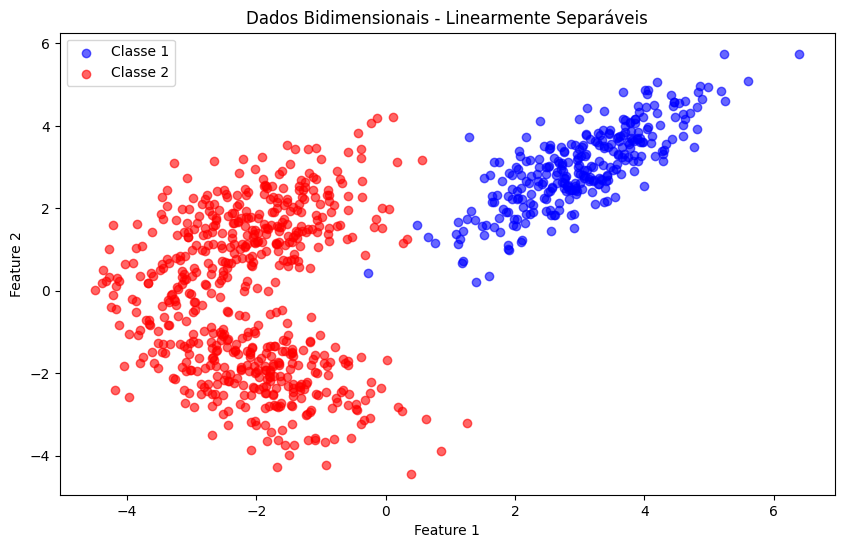

In [94]:
# O método multivariate_normal é uma generalização da distribuição normal 1D para dimensões maiores
data_class1 = np.random.multivariate_normal(mean_class1, cov_matrix_class1, n)
data_class2 = np.random.multivariate_normal(mean_class2, cov_matrix_class2, n)
data_class2b = np.random.multivariate_normal(mean_class2b, cov_matrix_class2b, n)
data_class2 = np.vstack((data_class2, data_class2b))

# Visualizando os dados e as médias
plt.figure(figsize = (10, 6))
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label='Classe 1', alpha = 0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red', label='Classe 2', alpha = 0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados Bidimensionais - Linearmente Separáveis')
plt.legend()
plt.show()

### Parte 2: Treinamento e Avaliação dos Classificadores

Dividir os dados em treino e teste

In [95]:
from sklearn.model_selection import train_test_split

# Concatenando dados para as classes
X = np.vstack((data_class1, data_class2)) # Concatena as matrizes data_class1 e data_class2 verticalmente
y = np.hstack((np.zeros(n), np.ones(2*n))) # Concatena os dois np.arrays horizontalmente. Classe 0 para data_class1, Classe 1 para data_class2

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

Treinamento

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Treinamento do classificador LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Treinamento do classificador QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

Acurácia LDA: 0.99
Precisão LDA: 0.99
Acurácia QDA: 1.00
Precisão QDA: 0.99


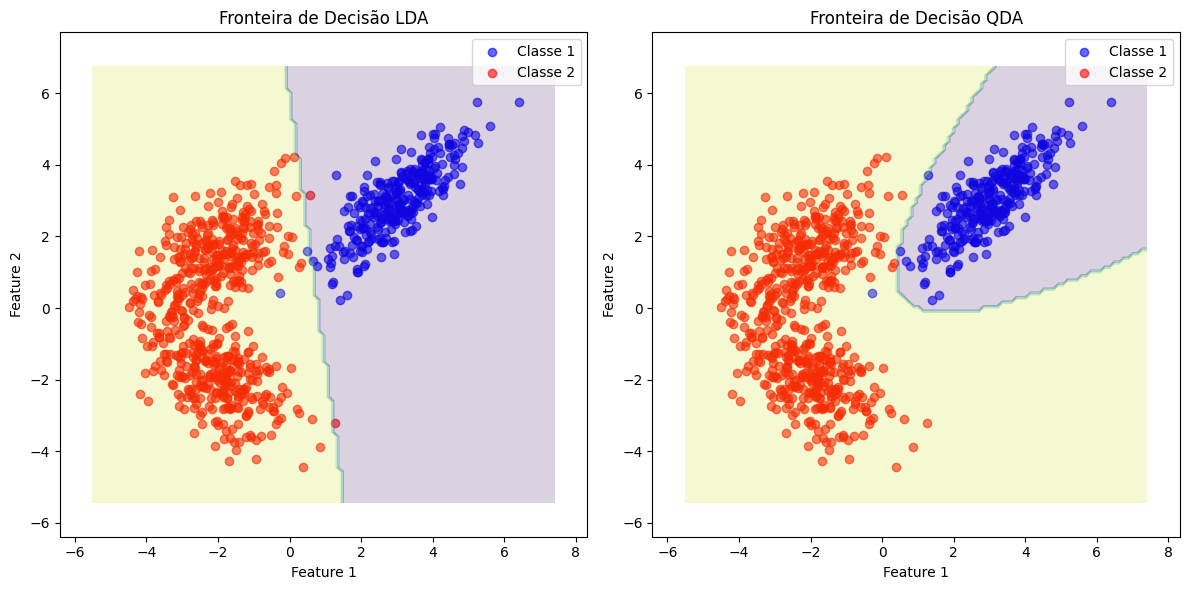

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Previsões
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)

# Avaliação das precisões
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)

# Impressão das métricas
print(f'Acurácia LDA: {accuracy_lda:.2f}')
print(f'Precisão LDA: {precision_lda:.2f}')
print(f'Acurácia QDA: {accuracy_qda:.2f}')
print(f'Precisão QDA: {precision_qda:.2f}')

# Visualização dos dados e fronteiras de decisão
plt.figure(figsize=(12, 6))

# Gráfico 1: Fronteira de decisão LDA
plt.subplot(1, 2, 1)
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue',
label='Classe 1', alpha=0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red',
label='Classe 2', alpha=0.6)

# Criando a grade para a fronteira de decisão LDA
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z_lda = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lda = Z_lda.reshape(xx.shape)

# Plotando a fronteira de decisão LDA
plt.contourf(xx, yy, Z_lda, alpha=0.2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão LDA')
plt.legend()
plt.axis('equal')

# Gráfico 2: Fronteira de decisão QDA
plt.subplot(1, 2, 2)
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue',
label='Classe 1', alpha=0.6)
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red',
label='Classe 2', alpha=0.6)

# Criando a grade para a fronteira de decisão QDA
Z_qda = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z_qda = Z_qda.reshape(xx.shape)

# Plotando a fronteira de decisão QDA
plt.contourf(xx, yy, Z_qda, alpha=0.2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fronteira de Decisão QDA')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()


### Parte 3: Análise e Discussão

Curva ROC para LDA

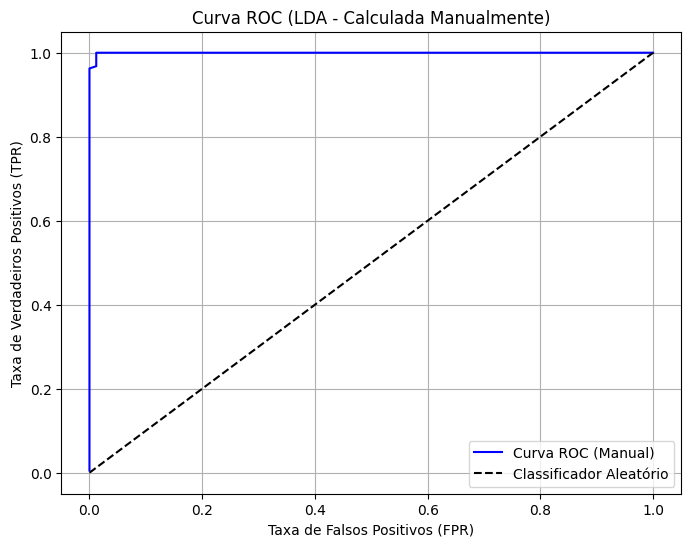

In [98]:
# Obtenção da função discriminante (valores para a classe 1)
discriminant_scores = lda.decision_function(X_test)

# Limiar de decisão variando para cálculo da curva ROC manual
thresholds = np.linspace(min(discriminant_scores), max(discriminant_scores), 100)
tpr_list = [] # Taxa de Verdadeiros Positivos
fpr_list = [] # Taxa de Falsos Positivos

# Cálculo de TPR e FPR para cada limiar
for threshold in thresholds:
  y_pred = (discriminant_scores >= threshold).astype(int) # Classe 1 se score >= threshold

  # Taxa de Verdadeiros Positivos (TPR)
  tp = np.sum((y_pred == 1) & (y_test == 1))
  fn = np.sum((y_pred == 0) & (y_test == 1))
  tpr = tp / (tp + fn)
  tpr_list.append(tpr)

  # Taxa de Falsos Positivos (FPR)
  fp = np.sum((y_pred == 1) & (y_test == 0))
  tn = np.sum((y_pred == 0) & (y_test == 0))
  fpr = fp / (fp + tn)
  fpr_list.append(fpr)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', label='Curva ROC (Manual)')

plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (LDA - Calculada Manualmente)')
plt.legend()
plt.grid(True)
plt.show()

Curva ROC para QDA

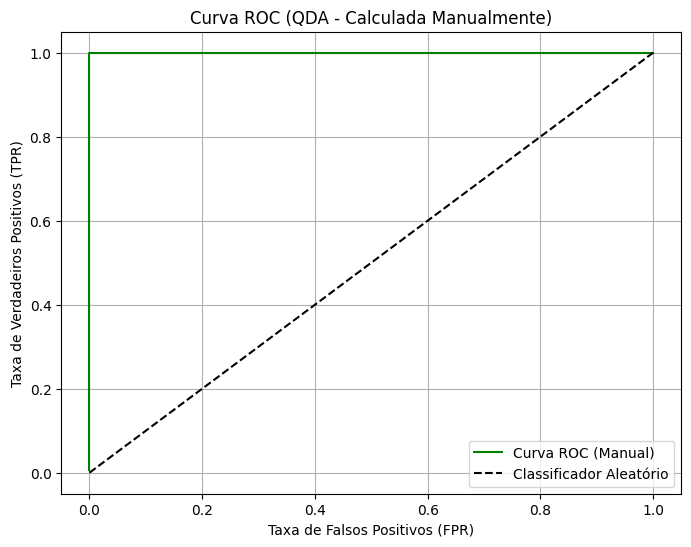

In [99]:
# Obtenção da função discriminante (valores para a classe 1)
discriminant_scores = qda.decision_function(X_test)

# Limiar de decisão variando para cálculo da curva ROC manual
thresholds = np.linspace(min(discriminant_scores), max(discriminant_scores), 100)
tpr_list_qda = [] # Taxa de Verdadeiros Positivos
fpr_list_qda = [] # Taxa de Falsos Positivos

# Cálculo de TPR e FPR para cada limiar
for threshold in thresholds:
  y_pred = (discriminant_scores >= threshold).astype(int) # Classe 1 se score >= threshold

  # Taxa de Verdadeiros Positivos (TPR)
  tp = np.sum((y_pred == 1) & (y_test == 1))
  fn = np.sum((y_pred == 0) & (y_test == 1))
  tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
  tpr_list_qda.append(tpr)

  # Taxa de Falsos Positivos (FPR)
  fp = np.sum((y_pred == 1) & (y_test == 0))
  tn = np.sum((y_pred == 0) & (y_test == 0))
  fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
  fpr_list_qda.append(fpr)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_list_qda, tpr_list_qda, color='green', label='Curva ROC (Manual)')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (QDA - Calculada Manualmente)')
plt.legend()
plt.grid(True)
plt.show()